In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 400;

<IPython.core.display.Javascript object>

In [4]:
!conda update -y --all

Fetching package metadata .........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/nbcommon/anaconda3_431:
#
_license                  1.1                      py36_1  
alabaster                 0.7.10                   py36_0  
anaconda                  custom                   py36_0  
anaconda-client           1.6.3                    py36_0  
anaconda-navigator        1.6.3                    py36_0  
anaconda-project          0.6.0                    py36_0  
asn1crypto                0.22.0                   py36_0  
astroid                   1.4.9                    py36_0  
astropy                   1.3.3               np111py36_0  
babel                     2.4.0                    py36_0  
backports                 1.0                      py36_0  
beautifulsoup4            4.6.0                    py36_0  
bitarray                  0.8.1                    py36_0  
bkcharts                  0.2               

In [5]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from matplotlib import rcParams
rcParams['figure.figsize'] = (15, 8)
rcParams['legend.fontsize'] = 16
rcParams['axes.labelsize'] = 16

In [6]:
from pandas.plotting import parallel_coordinates
from pandas.plotting import andrews_curves

In [7]:
#test_url  = "https://drive.google.com/open?id=0B0F5Yxb1d11bajAtcWUzMFoxYUE"
#train_url = "https://drive.google.com/open?id=0B0F5Yxb1d11bZHJsY1dybDRkQWM"
test_url  = "titanic-test.csv"
train_url = "titanic-train.csv"
df_train  = pd.read_csv(train_url)
df_test   = pd.read_csv(test_url)
pieces    = {'train': df_train, 'test': df_test}
df_combo  = result = pd.concat(pieces)

In [8]:
df_combo.shape

(1309, 12)

In [9]:
# clean up columns that add no value
#del df_combo['PassengerId']

In [10]:
df_combo.head()

Age Cabin Embarked     Fare  \
test 0  34.5   NaN        Q   7.8292   
     1  47.0   NaN        S   7.0000   
     2  62.0   NaN        Q   9.6875   
     3  27.0   NaN        S   8.6625   
     4  22.0   NaN        S  12.2875   

                                                Name  Parch  PassengerId  \
test 0                              Kelly, Mr. James      0          892   
     1              Wilkes, Mrs. James (Ellen Needs)      0          893   
     2                     Myles, Mr. Thomas Francis      0          894   
     3                              Wirz, Mr. Albert      0          895   
     4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)      1          896   

        Pclass     Sex  SibSp  Survived   Ticket  
test 0       3    male      0       NaN   330911  
     1       3  female      1       NaN   363272  
     2       2    male      0       NaN   240276  
     3       3    male      0       NaN   315154  
     4       3  female      1       NaN  3101298

In [11]:
df_combo.tail()

Age Cabin Embarked   Fare  \
train 886  27.0   NaN        S  13.00   
      887  19.0   B42        S  30.00   
      888   NaN   NaN        S  23.45   
      889  26.0  C148        C  30.00   
      890  32.0   NaN        Q   7.75   

                                               Name  Parch  PassengerId  \
train 886                     Montvila, Rev. Juozas      0          887   
      887              Graham, Miss. Margaret Edith      0          888   
      888  Johnston, Miss. Catherine Helen "Carrie"      2          889   
      889                     Behr, Mr. Karl Howell      0          890   
      890                       Dooley, Mr. Patrick      0          891   

           Pclass     Sex  SibSp  Survived      Ticket  
train 886       2    male      0       0.0      211536  
      887       1  female      0       1.0      112053  
      888       3  female      1       0.0  W./C. 6607  
      889       1    male      0       1.0      111369  
      890       3    male      0       0.0      370376

In [12]:
def analize_dataframe(df,target):
    df_dupl = df[df.duplicated(keep=False)]
    print("Analyzing {} {}:\n\tshape: {}\n\tduplicate rows: {}\n{}".format(type(df).__name__, id(df), 
                                                df.shape, 
                                                df_dupl.shape[0], df_dupl.values
                                                ))
    count_nan = df.size - df.count().sum()
    print("\tNaN#: {}\n\TDescribe:\n{}\n".format(count_nan, df.describe().T))
    df_numeric = pd.DataFrame.from_items([ 
                                           ('min',       df.select_dtypes(include=['number']).min()),
                                           ('max',       df.select_dtypes(include=['number']).max()),
                                           ('average',   df.select_dtypes(include=['number']).mean()),
                                           ('std',       df.select_dtypes(include=['number']).std()),
                                           ('median',    df.select_dtypes(include=['number']).median()),
                                           ('mode',      df.select_dtypes(include=['number']).mode().values[0]),
                                           ('skew',      df.select_dtypes(include=['number']).skew()),
                                           ('kurt',      df.select_dtypes(include=['number']).kurt()),
                                           ('NaN#',      df.select_dtypes(include=['number']).isnull().sum())
                                           ], orient='index', columns=df.select_dtypes(include=['number']).columns)
    print("\trobust:\n{}\n".format(df_numeric.T))
    print("Non numeric columns:")
    for col in df.select_dtypes(exclude=['number']).columns:
        #print("\tcolumn: {}\n{}\n".format(col,df[col].value_counts(normalize=True, sort=True)))
        print("\tcolumn: {}\n".format(col))
        df_numeric[col] = np.nan
        df_numeric.set_value('NaN#', col, df[col].isnull().sum())
        df_numeric.set_value('min',  col, df[col].value_counts(normalize=True, sort=True).min())
        df_numeric.set_value('max',  col, df[col].value_counts(normalize=True, sort=True).max())
        df_numeric.set_value('average',  col, df[col].value_counts(normalize=True, sort=True).mean())
    for col in df.columns:
        df_numeric.set_value('#unique',  col, df[col].value_counts().count())
        df_numeric.set_value('type',     col, df[col].dtype)
        plt.figure()
        if np.issubdtype(df[col].dtype, np.number):
            df[col].plot(kind='hist',title=col,bins=100)
        #else:
            #df[col].value_counts().plot(kind='bar', title=col)
    color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
    # create separate boxplots for INTEGER than FLOAT
    plt.figure()
    df.select_dtypes(include=['integer']).plot.box(color=color, sym='r+', vert=False)
    plt.figure()
    df.select_dtypes(include=['float']).plot.box(color=color, sym='r+', vert=False)
    # now try to see if there is correlation
    df_corr = df.corr()
    plt.figure()
    sns.heatmap(df_corr, vmax=.8, annot=True, square=True, cmap="RdYlBu_r");
    #plt.figure()
    #pd.plotting.andrews_curves(df.select_dtypes(include=['number']), target)
    #plt.figure()
    #pd.plotting.parallel_coordinates(df.select_dtypes(include=['number']), target)
    plt.figure()
    pd.plotting.scatter_matrix(df, alpha=0.2, diagonal='kde')
    #--
    plt.figure()
    pd.plotting.radviz(df.select_dtypes(include=['number']).dropna(axis=0), target)
    plt.show()
    return df_numeric

In [13]:
df_combo_filtered = df_combo[df_combo.columns.difference(['PassengerId', 'Name', 'Ticket', 'Cabin'])]

In [14]:
df_combo_filtered

Age Embarked      Fare  Parch  Pclass     Sex  SibSp  Survived
test  0    34.5        Q    7.8292      0       3    male      0       NaN
      1    47.0        S    7.0000      0       3  female      1       NaN
      2    62.0        Q    9.6875      0       2    male      0       NaN
      3    27.0        S    8.6625      0       3    male      0       NaN
      4    22.0        S   12.2875      1       3  female      1       NaN
      5    14.0        S    9.2250      0       3    male      0       NaN
      6    30.0        Q    7.6292      0       3  female      0       NaN
      7    26.0        S   29.0000      1       2    male      1       NaN
      8    18.0        C    7.2292      0       3  female      0       NaN
      9    21.0        S   24.1500      0       3    male      2       NaN
      10    NaN        S    7.8958      0       3    male      0       NaN
      11   46.0        S   26.0000      0       1    male      0       NaN
      12   23.0        S   82.2667      0       1  female      1       NaN
      13   63.0        S   26.0000      0       2    male      1       NaN
      14   47.0        S   61.1750      0       1  female      1       NaN
      15   24.0        C   27.7208      0       2  female      1       NaN
      16   35.0        Q   12.3500      0       2    male      0       NaN
      17   21.0        C    7.2250      0       3    male      0       NaN
      18   27.0        S    7.9250      0       3  female      1       NaN
      19   45.0        C    7.2250      0       3  female      0       NaN
      20   55.0        C   59.4000      0       1    male      1       NaN
      21    9.0        S    3.1708      1       3    male      0       NaN
      22    NaN        S   31.6833      0       1  female      0       NaN
      23   21.0        C   61.3792      1       1    male      0       NaN
      24   48.0        C  262.3750      3       1  female      1       NaN
      25   50.0        S   14.5000      0       3    male      1       NaN
      26   22.0        C   61.9792      1       1  female      0       NaN
      27   22.5        C    7.2250      0       3    male      0       NaN
      28   41.0        S   30.5000      0       1    male      0       NaN
      29    NaN        C   21.6792      0       3    male      2       NaN
...         ...      ...       ...    ...     ...     ...    ...       ...
train 861  21.0        S   11.5000      0       2    male      1       0.0
      862  48.0        S   25.9292      0       1  female      0       1.0
      863   NaN        S   69.5500      2       3  female      8       0.0
      864  24.0        S   13.0000      0       2    male      0       0.0
      865  42.0        S   13.0000      0       2  female      0       1.0
      866  27.0        C   13.8583      0       2  female      1       1.0
      867  31.0        S   50.4958      0       1    male      0       0.0
      868   NaN        S    9.5000      0       3    male      0       0.0
      869   4.0        S   11.1333      1       3    male      1       1.0
      870  26.0        S    7.8958      0       3    male      0       0.0
      871  47.0        S   52.5542      1       1  female      1       1.0
      872  33.0        S    5.0000      0       1    male      0       0.0
      873  47.0        S    9.0000      0       3    male      0       0.0
      874  28.0        C   24.0000      0       2  female      1       1.0
      875  15.0        C    7.2250      0       3  female      0       1.0
      876  20.0        S    9.8458      0       3    male      0       0.0
      877  19.0        S    7.8958      0       3    male      0       0.0
      878   NaN        S    7.8958      0       3    male      0       0.0
      879  56.0        C   83.1583      1       1  female      0       1.0
      880  25.0        S   26.0000      1       2  female      0       1.0
      881  33.0        S    7.8958      0       3    male      0       0.0
      882  22.0        S   10.5167   

Analyzing DataFrame 140147806024872:
	shape: (1309, 8)
	duplicate rows: 224
[[27.0 'S' 8.6625 ..., 'male' 0 nan]
 [nan 'S' 7.8958 ..., 'male' 0 nan]
 [nan 'C' 21.6792 ..., 'male' 2 nan]
 ..., 
 [nan 'S' 7.8958 ..., 'male' 0 0.0]
 [25.0 'S' 7.05 ..., 'male' 0 0.0]
 [27.0 'S' 13.0 ..., 'male' 0 0.0]]
	NaN#: 684
\TDescribe:
           count       mean        std   min      25%      50%     75%  \
Age       1046.0  29.881138  14.413493  0.17  21.0000  28.0000  39.000   
Fare      1308.0  33.295479  51.758668  0.00   7.8958  14.4542  31.275   
Parch     1309.0   0.385027   0.865560  0.00   0.0000   0.0000   0.000   
Pclass    1309.0   2.294882   0.837836  1.00   2.0000   3.0000   3.000   
SibSp     1309.0   0.498854   1.041658  0.00   0.0000   0.0000   1.000   
Survived   891.0   0.383838   0.486592  0.00   0.0000   0.0000   1.000   

               max  
Age        80.0000  
Fare      512.3292  
Parch       9.0000  
Pclass      3.0000  
SibSp       8.0000  
Survived    1.0000  

	robust:
 

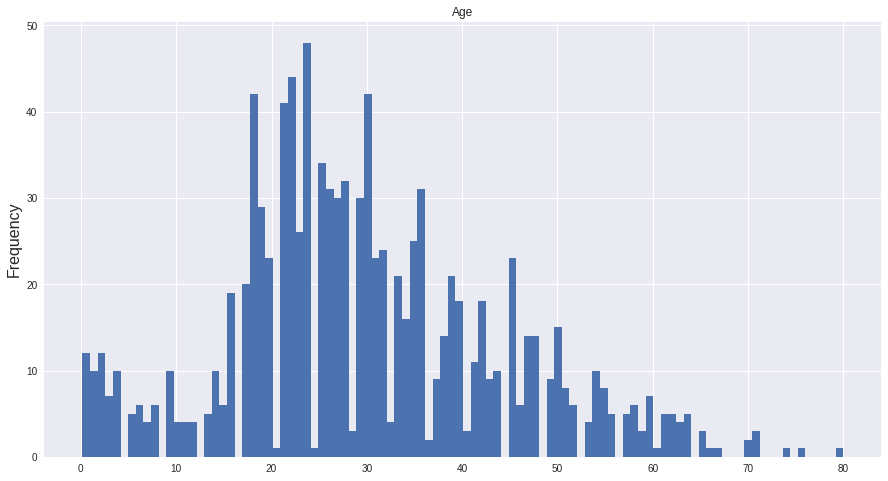

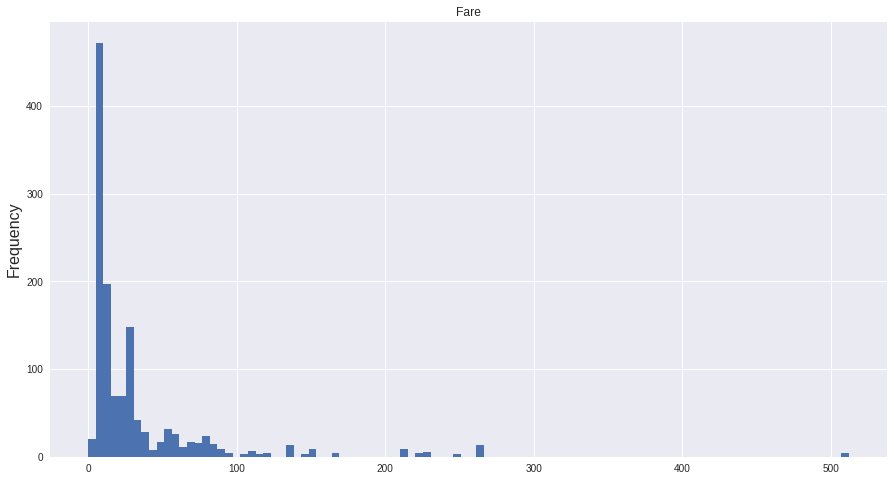

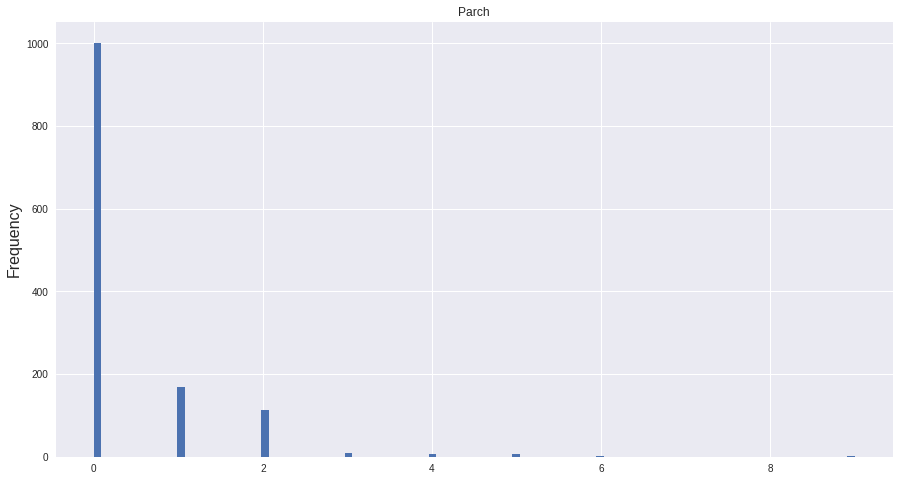

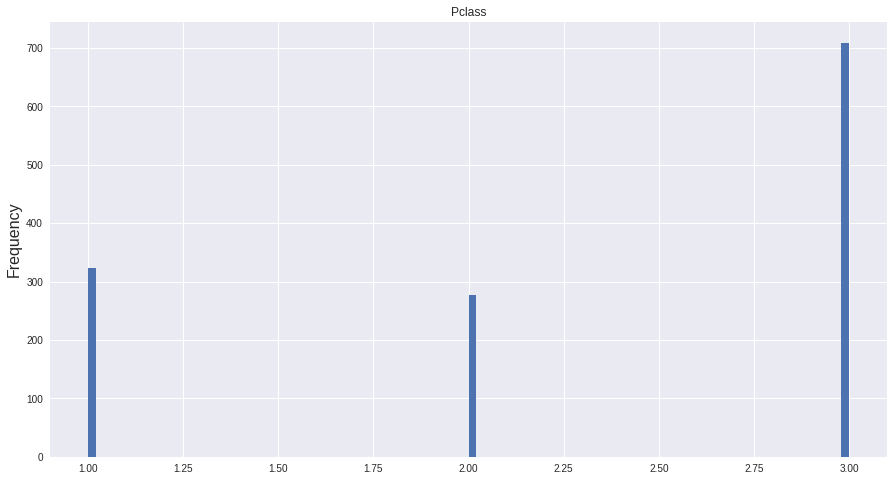

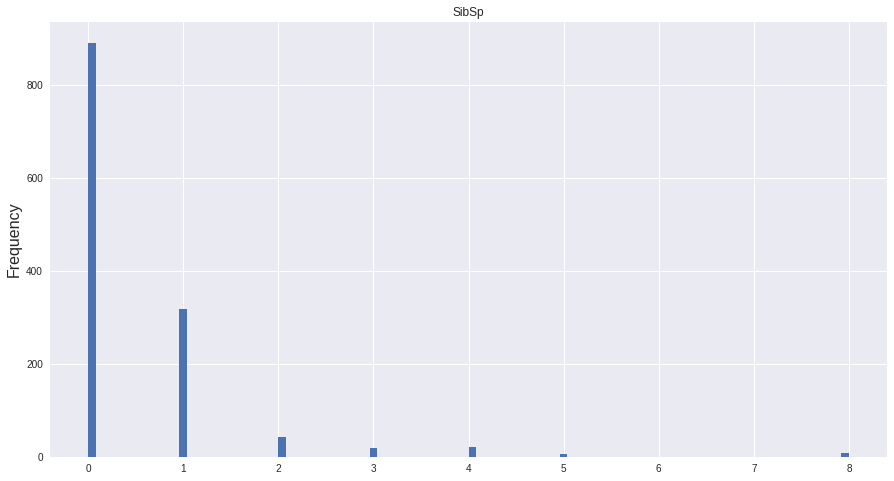

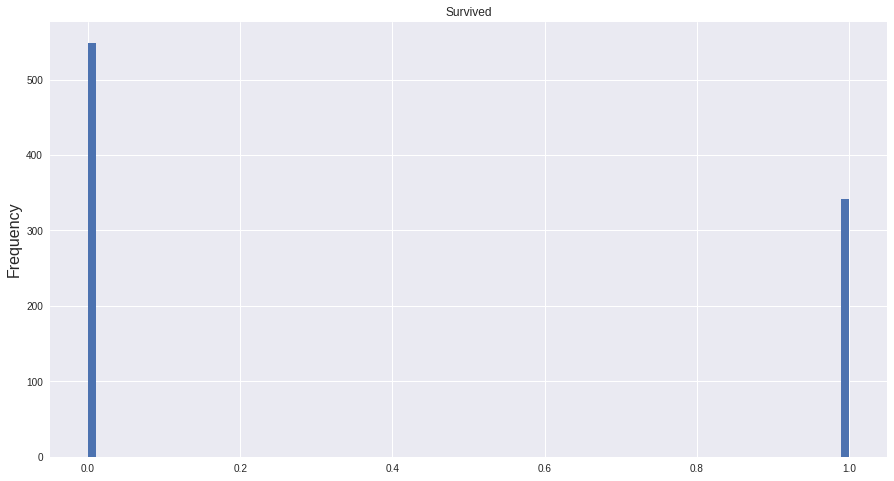

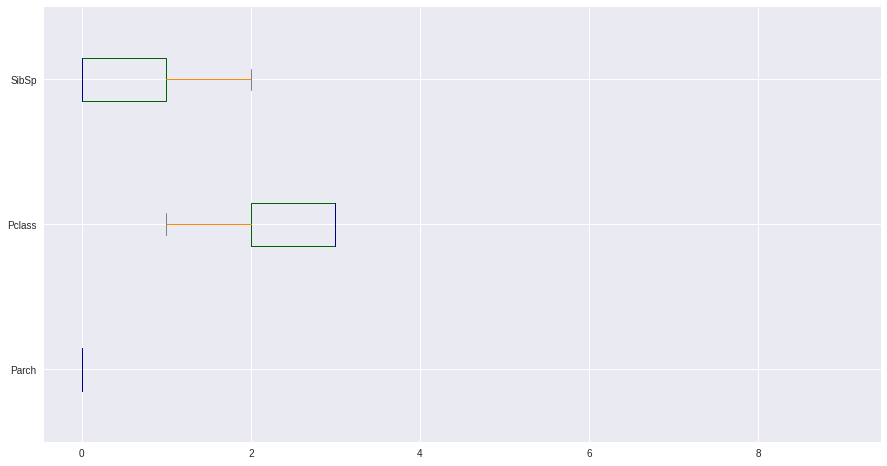

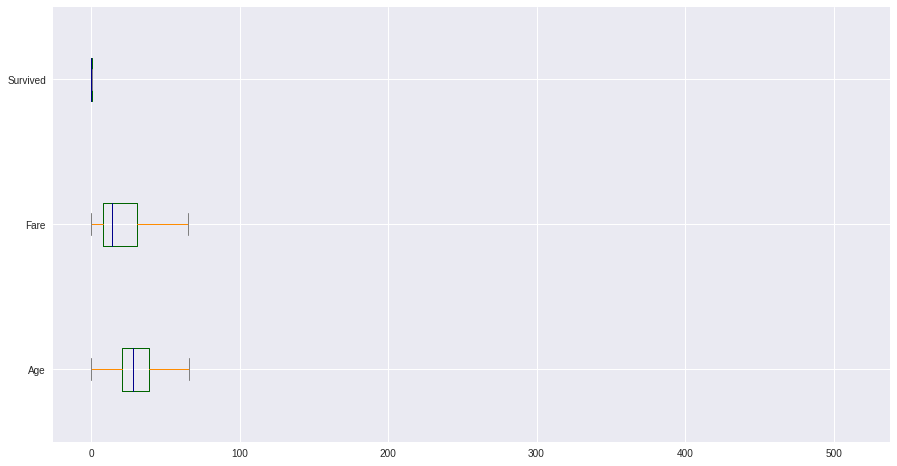

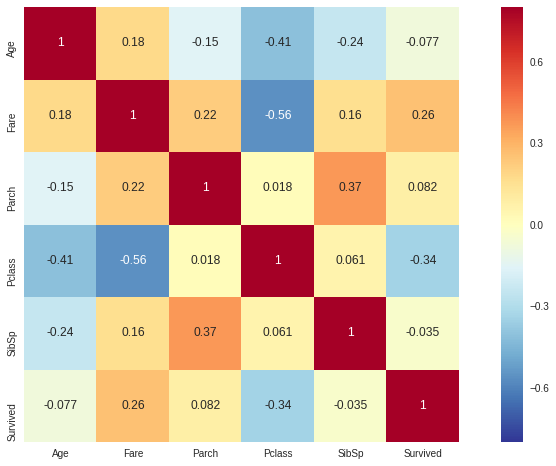

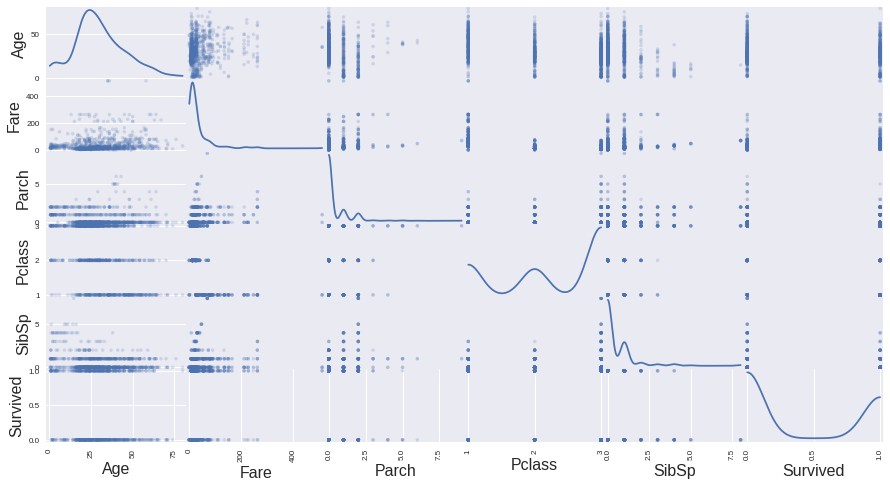

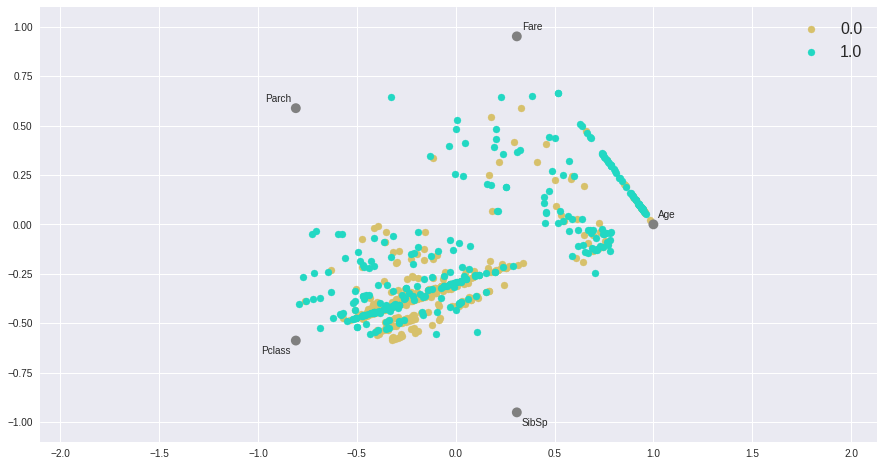

In [15]:
df_combo_numeric = analize_dataframe(df_combo_filtered, 'Survived')

In [16]:
df_combo_numeric

,Age,Fare,Parch,Pclass,SibSp,Survived,Embarked,Sex
min,0.17,0,0,1,0,0,0.0941086,0.355997
max,80,512.329,9,3,8,1,0.699311,0.644003
average,29.8811,33.2955,0.385027,2.29488,0.498854,0.383838,0.333333,0.5
std,14.4135,51.7587,0.86556,0.837836,1.04166,0.486592,NaN,NaN
median,28,14.4542,0,3,0,0,NaN,NaN
mode,24,8.05,0,3,0,0,NaN,NaN
skew,0.407675,4.36771,3.66908,-0.598647,3.84422,0.478523,NaN,NaN
kurt,0.146948,27.028,21.5411,-1.31508,20.0433,-1.775,NaN,NaN
NaN#,263,1,0,0,0,418,2,0
#unique,98,281,8,3,7,2,3,2


# Feature Engineering
Lets see what needs to be done for the NaN and other combination of features.

# Fare feature handling

In [17]:
df_combo[df_combo['Fare'].isnull()]

,,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
test,152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [18]:
df_combo[df_combo['Pclass'] == 3]['Fare'].mean()

13.302888700564969

In [21]:
df_combo['Fare'].fillna(df_combo[df_combo['Pclass'] == 3]['Fare'].mean(), inplace=True)

In [22]:
#check it is ok
df_combo[df_combo['Ticket'] == '3701']

,,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
test,152,60.5,NaN,S,13.302889,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


## Embarked feature handling

In [23]:
df_combo[df_combo['Embarked'].isnull()]

Age Cabin Embarked  Fare  \
train 61   38.0   B28      NaN  80.0   
      829  62.0   B28      NaN  80.0   

                                                Name  Parch  PassengerId  \
train 61                         Icard, Miss. Amelie      0           62   
      829  Stone, Mrs. George Nelson (Martha Evelyn)      0          830   

           Pclass     Sex  SibSp  Survived  Ticket  
train 61        1  female      0       1.0  113572  
      829       1  female      0       1.0  113572

In [24]:
df_combo['Embarked'].mode().values[0]

'S'

In [25]:
df_combo['Embarked'].fillna(df_combo['Embarked'].mode().values[0], inplace=True)

In [26]:
#check it is ok
df_combo[df_combo['Ticket'].isin(['113572', '3701'])]

Age Cabin Embarked       Fare  \
test  152  60.5   NaN        S  13.302889   
train 61   38.0   B28        S  80.000000   
      829  62.0   B28        S  80.000000   

                                                Name  Parch  PassengerId  \
test  152                         Storey, Mr. Thomas      0         1044   
train 61                         Icard, Miss. Amelie      0           62   
      829  Stone, Mrs. George Nelson (Martha Evelyn)      0          830   

           Pclass     Sex  SibSp  Survived  Ticket  
test  152       3    male      0       NaN    3701  
train 61        1  female      0       1.0  113572  
      829       1  female      0       1.0  113572

## Cabin feature handling

In [27]:
df_combo['Cabin'].fillna('Unknown', inplace=True)

## Age feature handling

In [28]:
df_combo[df_combo['Age'].isnull()]

Age    Cabin Embarked     Fare  \
test  10   NaN  Unknown        S   7.8958   
      22   NaN  Unknown        S  31.6833   
      29   NaN  Unknown        C  21.6792   
      33   NaN  Unknown        S  23.4500   
      36   NaN  Unknown        S   8.0500   
      39   NaN  Unknown        S  56.4958   
      41   NaN      D34        S  26.5500   
      47   NaN  Unknown        Q   7.7500   
      54   NaN  Unknown        C  15.5792   
      58   NaN  Unknown        S  16.1000   
      65   NaN  Unknown        S  21.0000   
      76   NaN  Unknown        S   8.0500   
      83   NaN  Unknown        S   7.8958   
      84   NaN  Unknown        Q  10.7083   
      85   NaN  Unknown        C  14.4542   
      88   NaN  Unknown        Q   7.7500   
      91   NaN  Unknown        S   7.7750   
      93   NaN  Unknown        S   8.0500   
      102  NaN  Unknown        Q   7.7500   
      107  NaN  Unknown        Q   7.7500   
      108  NaN  Unknown        S   8.7125   
      111  NaN  Unknown        Q   7.7792   
      116  NaN  Unknown        C   6.4375   
      121  NaN  Unknown        Q   7.7500   
      124  NaN  Unknown        Q   7.7500   
      127  NaN  Unknown        Q  23.2500   
      132  NaN  Unknown        S  25.4667   
      133  NaN  Unknown        C   6.4375   
      146  NaN      E46        S  51.8625   
      148  NaN  Unknown        S  26.5500   
...        ...      ...      ...      ...   
train 718  NaN  Unknown        Q  15.5000   
      727  NaN  Unknown        Q   7.7375   
      732  NaN  Unknown        S   0.0000   
      738  NaN  Unknown        S   7.8958   
      739  NaN  Unknown        S   7.8958   
      740  NaN      D45        S  30.0000   
      760  NaN  Unknown        S  14.5000   
      766  NaN  Unknown        C  39.6000   
      768  NaN  Unknown        Q  24.1500   
      773  NaN  Unknown        C   7.2250   
      776  NaN      F38        Q   7.7500   
      778  NaN  Unknown        Q   7.7375   
      783  NaN  Unknown        S  23.4500   
      790  NaN  Unknown        Q   7.7500   
      792  NaN  Unknown        S  69.5500   
      793  NaN  Unknown        C  30.6958   
      815  NaN     B102        S   0.0000   
      825  NaN  Unknown        Q   6.9500   
      826  NaN  Unknown        S  56.4958   
      828  NaN  Unknown        Q   7.7500   
      832  NaN  Unknown        C   7.2292   
      837  NaN  Unknown        S   8.0500   
      839  NaN      C47        C  29.7000   
      846  NaN  Unknown        S  69.5500   
      849  NaN      C92        C  89.1042   
      859  NaN  Unknown        C   7.2292   
      863  NaN  Unknown        S  69.5500   
      868  NaN  Unknown        S   9.5000   
      878  NaN  Unknown        S   7.8958   
      888  NaN  Unknown        S  23.4500   

                                                        Name  Parch  \
test  10                                    Ilieff, Mr. Ylio      0   
      22                Flegenheim, Mrs. Alfred (Antoinette)      0   
      29                                   Samaan, Mr. Elias      0   
      33   Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"      2   
      36                                 Roth, Miss. Sarah A      0   
      39                                       Hee, Mr. Ling      0   
      41                         Franklin, Mr. Thomas Parham      0   
      47                            Shaughnessy, Mr. Patrick      0   
      54                   Mangiavacchi, Mr. Serafino Emilio      0   
      58                           Davison, Mr. Thomas Henry      0   
      65   Corey, Mrs. Percy C (Mary Phyllis Elizabeth Mi...      0   
      76                                    Miles, Mr. Frank      0   
      83                                Demetri, Mr. Marinko      0   
      84                               Lamb, Mr. John Joseph      0   
      85                                  Khalil, Mr. Betros      0   
      88                             O'Donoghue, Ms. Bridget      0   
      91     

In [29]:
df_combo[(df_combo['Age'].notnull()) & (df_combo['Sex'] == 'female') & (df_combo['Parch'] == 0)]

Age    Cabin Embarked      Fare  \
test  1    47.0  Unknown        S    7.0000   
      6    30.0  Unknown        Q    7.6292   
      8    18.0  Unknown        C    7.2292   
      12   23.0      B45        S   82.2667   
      14   47.0      E31        S   61.1750   
      15   24.0  Unknown        C   27.7208   
      18   27.0  Unknown        S    7.9250   
      19   45.0  Unknown        C    7.2250   
      37   21.0  Unknown        S    8.6625   
      43   30.0  Unknown        S   13.0000   
      44   45.0      D19        S   52.5542   
      48   60.0      D15        C   76.2917   
      59   36.0      B61        C  262.3750   
      63   22.0  Unknown        Q    7.7250   
      66   18.0  Unknown        Q    7.8792   
      70   24.0  Unknown        Q    7.7500   
      72   29.0  Unknown        S    7.9250   
      74   35.0     C130        C  211.5000   
      77   55.0     C101        S   25.7000   
      79   24.0  Unknown        Q    7.7500   
      86   27.0  Unknown        Q    7.8792   
      87   18.0  Unknown        S    8.0500   
      90   22.0  Unknown        S   13.9000   
      96   76.0      C46        S   78.8500   
      98   20.0  Unknown        S    7.8542   
      100  43.0     C116        C   55.4417   
      112  36.0      A29        C   31.6792   
      113  18.5  Unknown        Q    7.2833   
      114  63.0  C55 C57        S  221.7792   
      119  29.0  Unknown        S   26.0000   
...         ...      ...      ...       ...   
train 716  38.0      C45        C  227.5250   
      717  27.0     E101        S   10.5000   
      726  30.0  Unknown        S   21.0000   
      729  25.0  Unknown        S    7.9250   
      730  29.0       B5        S  211.3375   
      747  30.0  Unknown        S   13.0000   
      759  33.0      B77        S   86.5000   
      765  51.0      D11        S   77.9583   
      767  30.5  Unknown        Q    7.7500   
      772  57.0      E77        S   10.5000   
      777   5.0  Unknown        S   12.4750   
      780  13.0  Unknown        C    7.2292   
      781  17.0      B20        S   57.0000   
      786  18.0  Unknown        S    7.4958   
      796  49.0      D17        S   25.9292   
      797  31.0  Unknown        S    8.6833   
      807  18.0  Unknown        S    7.7750   
      809  33.0       E8        S   53.1000   
      816  23.0  Unknown        S    7.9250   
      829  62.0      B28        S   80.0000   
      830  15.0  Unknown        C   14.4542   
      842  30.0  Unknown        C   31.0000   
      854  44.0  Unknown        S   26.0000   
      862  48.0      D17        S   25.9292   
      865  42.0  Unknown        S   13.0000   
      866  27.0  Unknown        C   13.8583   
      874  28.0  Unknown        C   24.0000   
      875  15.0  Unknown        C    7.2250   
      882  22.0  Unknown        S   10.5167   
      887  19.0      B42        S   30.0000   

                                                        Name  Parch  \
test  1                     Wilkes, Mrs. James (Ellen Needs)      0   
      6                                 Connolly, Miss. Kate      0   
      8            Abrahim, Mrs. Joseph (Sophie Halaut Easu)      0   
      12       Snyder, Mrs. John Pillsbury (Nelle Stevenson)      0   
      14   Chaffee, Mrs. Herbert Fuller (Carrie Constance...      0   
      15       del Carlo, Mrs. Sebastiano (Argenia Genovesi)      0   
      18                        Ilmakangas, Miss. Ida Livija      0   
      19               Assaf Khalil, Mrs. Mariana (Miriam")"      0   
      37                                  Cacic, Miss. Manda      0   
      43               Corbett, Mrs. Walter H (Irene Colvin)      0   
      44    Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)      0   
      48     Bucknell, Mrs. William Robert (Emma Eliza Ward)      0   
      59                         Chaudanson, Miss. Victorine      0   
      63                        Bradley, Miss. Bridget Delia      0   
      66                        

In [30]:
#df_combo[(df_combo['Age'].notnull()) & (df_combo['Sex'] == 'female') & (df_combo['Parch'] == 0)]
#df["postTestScore"].fillna(df.groupby("sex")["postTestScore"].transform("mean"), inplace=True)
#
#df_combo.groupby(['Sex','Parch','SibSp'])['Age'].mean()
df_combo.groupby(['Sex','Parch'])['Age'].median()

Sex     Parch
female  0        29.0
        1        24.0
        2        21.0
        3        42.0
        4        45.0
        5        39.0
        6        43.0
        9         NaN
male    0        29.0
        1        21.0
        2        12.0
        3        38.5
        4        52.0
        5        39.5
        6        40.0
        9         NaN
Name: Age, dtype: float64

In [31]:
df_combo.groupby(['Sex','SibSp'])['Age'].median()

Sex     SibSp
female  0        28.00
        1        29.00
        2        20.00
        3        23.00
        4         9.00
        5        13.00
        8          NaN
male    0        28.75
        1        31.00
        2        24.00
        3        10.00
        4         7.00
        5        10.00
        8        14.50
Name: Age, dtype: float64

In [32]:
df_combo.groupby(['Sex','Parch','SibSp'])['Age'].median()

Sex     Parch  SibSp
female  0      0        28.0
               1        29.5
               2        53.0
               3        31.5
        1      0        22.5
               1        27.5
               2         5.0
               3         5.5
        2      0        26.0
               1        23.0
               2        19.5
               3        23.0
               4         9.0
               5        13.0
               8         NaN
        3      0        30.0
               1        48.0
               2        24.0
        4      0        29.0
               1        52.5
        5      0        40.0
               1        38.5
        6      1        43.0
        9      1         NaN
male    0      0        29.0
               1        31.0
               2        24.0
               3        31.0
        1      0        36.0
               1        26.0
               2        12.0
               3         6.0
               4         7.0
        2      0      

In [33]:
df_combo[(df_combo['Age'].notnull()) & (df_combo['Sex'] == 'female') & (df_combo['Parch'] == 0) & (df_combo['SibSp'] == 3)]

Age    Cabin Embarked   Fare  \
train 85   33.0  Unknown        S  15.85   
      726  30.0  Unknown        S  21.00   

                                                        Name  Parch  \
train 85   Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...      0   
      726        Renouf, Mrs. Peter Henry (Lillian Jefferys)      0   

           PassengerId  Pclass     Sex  SibSp  Survived   Ticket  
train 85            86       3  female      3       1.0  3101278  
      726          727       2  female      3       1.0    31027

In [34]:
df_combo[(df_combo['Age'].notnull()) & (df_combo['Sex'] == 'female') & (df_combo['Parch'] == 0) & (df_combo['SibSp'] == 2)]

Age    Cabin Embarked     Fare  \
test  77   55.0     C101        S  25.7000   
      356  59.0     C101        S  51.4792   
      376  22.0  Unknown        S   8.6625   
train 38   18.0  Unknown        S  18.0000   
      571  53.0     C101        S  51.4792   

                                                        Name  Parch  \
test  77   Cornell, Mrs. Robert Clifford (Malvina Helen L...      0   
      356     Brown, Mrs. John Murray (Caroline Lane Lamson)      0   
      376                                  Kink, Miss. Maria      0   
train 38                  Vander Planke, Miss. Augusta Maria      0   
      571      Appleton, Mrs. Edward Dale (Charlotte Lamson)      0   

           PassengerId  Pclass     Sex  SibSp  Survived  Ticket  
test  77           969       1  female      2       NaN   11770  
      356         1248       1  female      2       NaN   11769  
      376         1268       3  female      2       NaN  315152  
train 38            39       3  female      2       0.0  345764  
      571          572       1  female      2       1.0   11769

In [35]:
df_combo[df_combo['Ticket'].isin(['349220'])]

,,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
test,10,NaN,Unknown,S,7.8958,"Ilieff, Mr. Ylio",0,902,3,male,0,NaN,349220


In [36]:
df_combo['Name'].str.split(', ').str.get(1).str.split('.').str.get(0).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona',
       'Don', 'Mme', 'Major', 'Lady', 'Sir', 'Mlle', 'Capt',
       'the Countess', 'Jonkheer'], dtype=object)

In [37]:
title_dict = {}
for entry in df_combo['Name'].str.split(', ').str.get(1).str.split('.').str.get(0).unique():
    print("entry:" + entry)
    title_dict[entry] = entry
title_dict

entry:Mr
entry:Mrs
entry:Miss
entry:Master
entry:Ms
entry:Col
entry:Rev
entry:Dr
entry:Dona
entry:Don
entry:Mme
entry:Major
entry:Lady
entry:Sir
entry:Mlle
entry:Capt
entry:the Countess
entry:Jonkheer


{'Capt': 'Capt',
 'Col': 'Col',
 'Don': 'Don',
 'Dona': 'Dona',
 'Dr': 'Dr',
 'Jonkheer': 'Jonkheer',
 'Lady': 'Lady',
 'Major': 'Major',
 'Master': 'Master',
 'Miss': 'Miss',
 'Mlle': 'Mlle',
 'Mme': 'Mme',
 'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Ms': 'Ms',
 'Rev': 'Rev',
 'Sir': 'Sir',
 'the Countess': 'the Countess'}

In [38]:
title_xlate = {'Capt': 'PROF',
 'Col': 'PROF',
 'Don': 'MNOBLE',
 'Dona': 'FNOBLE',
 'Dr': 'PROF',
 'Jonkheer': 'PROF',
 'Lady': 'FNOBLE',
 'Major': 'PROF',
 'Master': 'MYOUNG',
 'Miss': 'FYOUNG',
 'Mlle': 'FYOUNG',
 'Mme': 'WOMAN',
 'Mr': 'MAN',
 'Mrs': 'WOMAN',
 'Ms': 'FYOUNG',
 'Rev': 'PROF',
 'Sir': 'MNOBLE',
 'the Countess': 'FNOBLE'}

In [39]:
df_combo['Title'] = df_combo['Name'].str.split(', ').str.get(1).str.split('.').str.get(0)

In [40]:
df_combo.replace({"Title": title_xlate}, inplace=True)

In [41]:
df_combo.groupby(['Sex','Title'])['Age'].median()

Sex     Title 
female  FNOBLE    39.0
        FYOUNG    22.0
        PROF      49.0
        WOMAN     35.0
male    MAN       29.0
        MNOBLE    44.5
        MYOUNG     4.0
        PROF      48.5
Name: Age, dtype: float64

In [44]:
df_combo['Age'].fillna(df_combo.groupby(['Sex','Title'])['Age'].median(), inplace=True)

In [45]:
df_combo[df_combo['Age'].isnull()]

Age    Cabin Embarked     Fare  \
test  10   NaN  Unknown        S   7.8958   
      22   NaN  Unknown        S  31.6833   
      29   NaN  Unknown        C  21.6792   
      33   NaN  Unknown        S  23.4500   
      36   NaN  Unknown        S   8.0500   
      39   NaN  Unknown        S  56.4958   
      41   NaN      D34        S  26.5500   
      47   NaN  Unknown        Q   7.7500   
      54   NaN  Unknown        C  15.5792   
      58   NaN  Unknown        S  16.1000   
      65   NaN  Unknown        S  21.0000   
      76   NaN  Unknown        S   8.0500   
      83   NaN  Unknown        S   7.8958   
      84   NaN  Unknown        Q  10.7083   
      85   NaN  Unknown        C  14.4542   
      88   NaN  Unknown        Q   7.7500   
      91   NaN  Unknown        S   7.7750   
      93   NaN  Unknown        S   8.0500   
      102  NaN  Unknown        Q   7.7500   
      107  NaN  Unknown        Q   7.7500   
      108  NaN  Unknown        S   8.7125   
      111  NaN  Unknown        Q   7.7792   
      116  NaN  Unknown        C   6.4375   
      121  NaN  Unknown        Q   7.7500   
      124  NaN  Unknown        Q   7.7500   
      127  NaN  Unknown        Q  23.2500   
      132  NaN  Unknown        S  25.4667   
      133  NaN  Unknown        C   6.4375   
      146  NaN      E46        S  51.8625   
      148  NaN  Unknown        S  26.5500   
...        ...      ...      ...      ...   
train 718  NaN  Unknown        Q  15.5000   
      727  NaN  Unknown        Q   7.7375   
      732  NaN  Unknown        S   0.0000   
      738  NaN  Unknown        S   7.8958   
      739  NaN  Unknown        S   7.8958   
      740  NaN      D45        S  30.0000   
      760  NaN  Unknown        S  14.5000   
      766  NaN  Unknown        C  39.6000   
      768  NaN  Unknown        Q  24.1500   
      773  NaN  Unknown        C   7.2250   
      776  NaN      F38        Q   7.7500   
      778  NaN  Unknown        Q   7.7375   
      783  NaN  Unknown        S  23.4500   
      790  NaN  Unknown        Q   7.7500   
      792  NaN  Unknown        S  69.5500   
      793  NaN  Unknown        C  30.6958   
      815  NaN     B102        S   0.0000   
      825  NaN  Unknown        Q   6.9500   
      826  NaN  Unknown        S  56.4958   
      828  NaN  Unknown        Q   7.7500   
      832  NaN  Unknown        C   7.2292   
      837  NaN  Unknown        S   8.0500   
      839  NaN      C47        C  29.7000   
      846  NaN  Unknown        S  69.5500   
      849  NaN      C92        C  89.1042   
      859  NaN  Unknown        C   7.2292   
      863  NaN  Unknown        S  69.5500   
      868  NaN  Unknown        S   9.5000   
      878  NaN  Unknown        S   7.8958   
      888  NaN  Unknown        S  23.4500   

                                                        Name  Parch  \
test  10                                    Ilieff, Mr. Ylio      0   
      22                Flegenheim, Mrs. Alfred (Antoinette)      0   
      29                                   Samaan, Mr. Elias      0   
      33   Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"      2   
      36                                 Roth, Miss. Sarah A      0   
      39                                       Hee, Mr. Ling      0   
      41                         Franklin, Mr. Thomas Parham      0   
      47                            Shaughnessy, Mr. Patrick      0   
      54                   Mangiavacchi, Mr. Serafino Emilio      0   
      58                           Davison, Mr. Thomas Henry      0   
      65   Corey, Mrs. Percy C (Mary Phyllis Elizabeth Mi...      0   
      76                                    Miles, Mr. Frank      0   
      83                                Demetri, Mr. Marinko      0   
      84                               Lamb, Mr. John Joseph      0   
      85                                  Khalil, Mr. Betros      0   
      88                             O'Donoghue, Ms. Bridget      0   
      91     

## New features

In [81]:
df_combo['FamilySize'] = df_combo['SibSp'] + df_combo['Parch'] + 1

In [82]:
df_combo_filtered = df_combo[df_combo.columns.difference(['PassengerId', 'Name', 'Ticket', 'Cabin'])]

Analyzing DataFrame 140546279641720:
	shape: (1309, 10)
	duplicate rows: 211
[[27.0 'S' 1 ..., 0 nan 'MAN']
 [nan 'S' 1 ..., 0 nan 'MAN']
 [nan 'C' 3 ..., 2 nan 'MAN']
 ..., 
 [19.0 'S' 1 ..., 0 0.0 'MAN']
 [nan 'S' 1 ..., 0 0.0 'MAN']
 [25.0 'S' 1 ..., 0 0.0 'MAN']]
	NaN#: 681
\TDescribe:
             count       mean        std   min      25%      50%     75%  \
Age         1046.0  29.881138  14.413493  0.17  21.0000  28.0000  39.000   
FamilySize  1309.0   1.883881   1.583639  1.00   1.0000   1.0000   2.000   
Fare        1309.0  33.280206  51.741830  0.00   7.8958  14.4542  31.275   
Parch       1309.0   0.385027   0.865560  0.00   0.0000   0.0000   0.000   
Pclass      1309.0   2.294882   0.837836  1.00   2.0000   3.0000   3.000   
SibSp       1309.0   0.498854   1.041658  0.00   0.0000   0.0000   1.000   
Survived     891.0   0.383838   0.486592  0.00   0.0000   0.0000   1.000   

                 max  
Age          80.0000  
FamilySize   11.0000  
Fare        512.3292  
Parch   

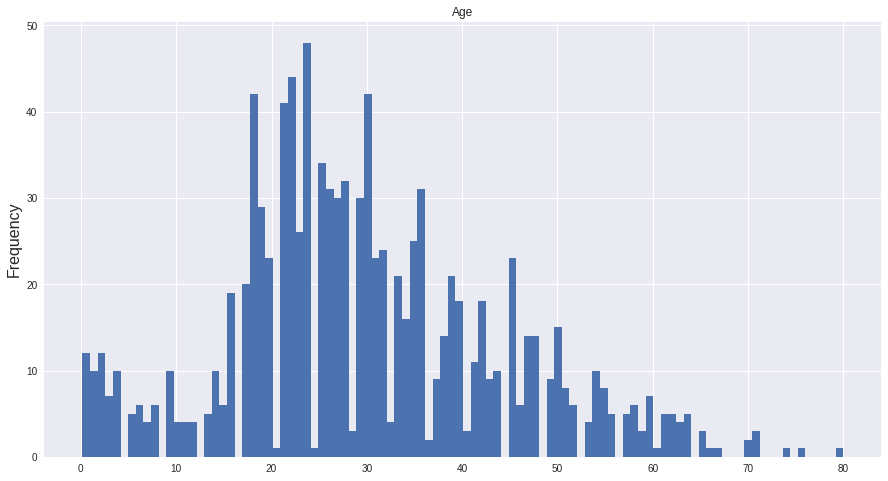

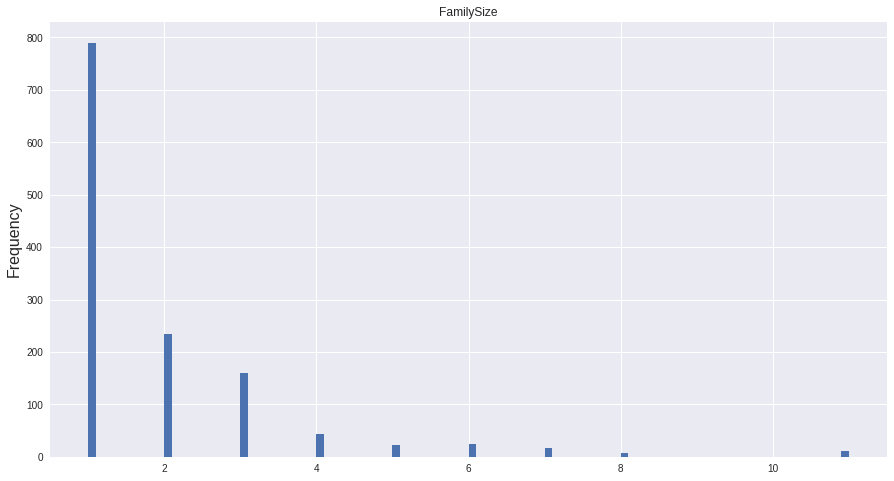

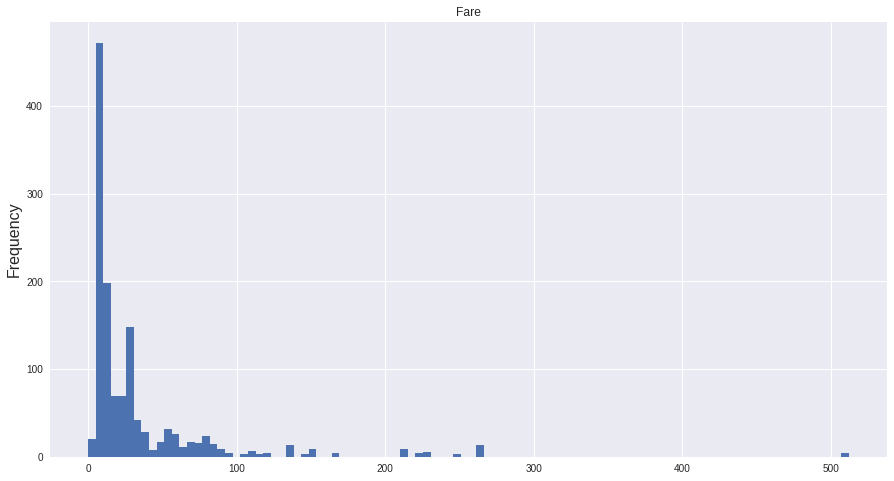

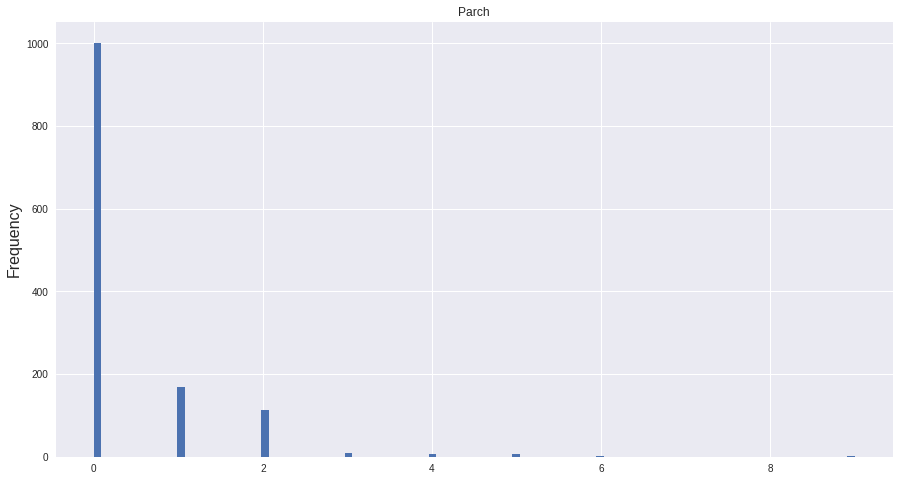

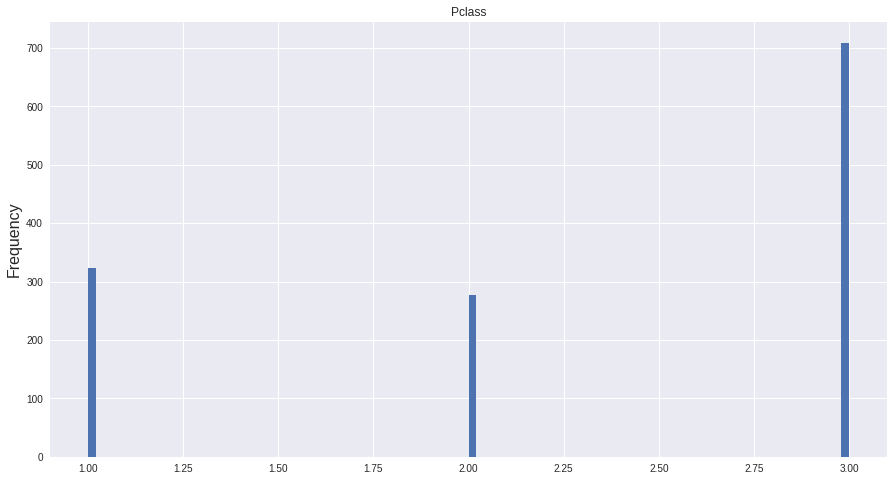

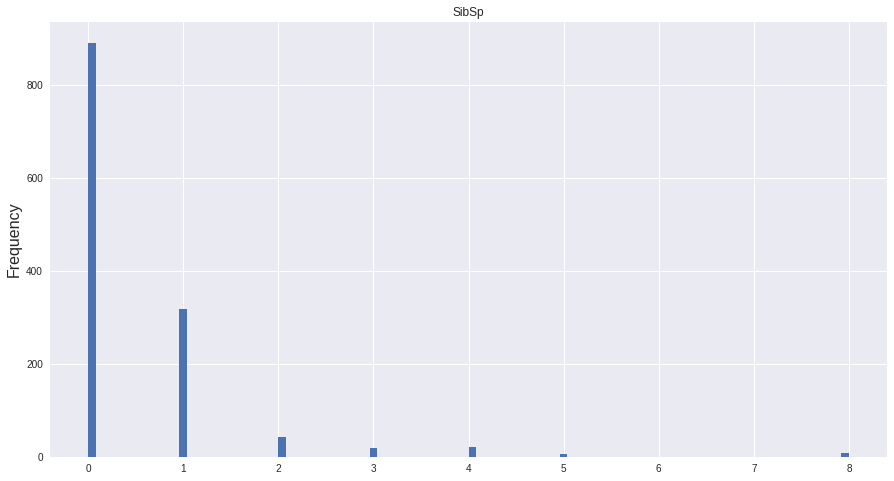

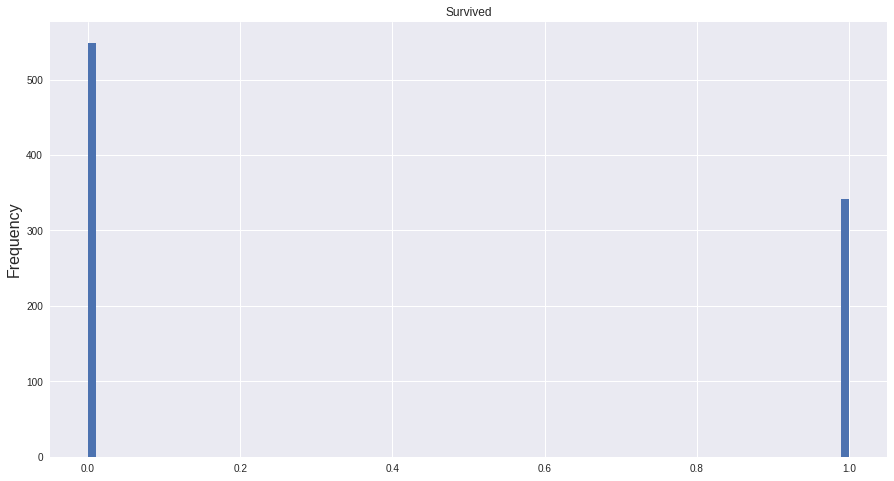

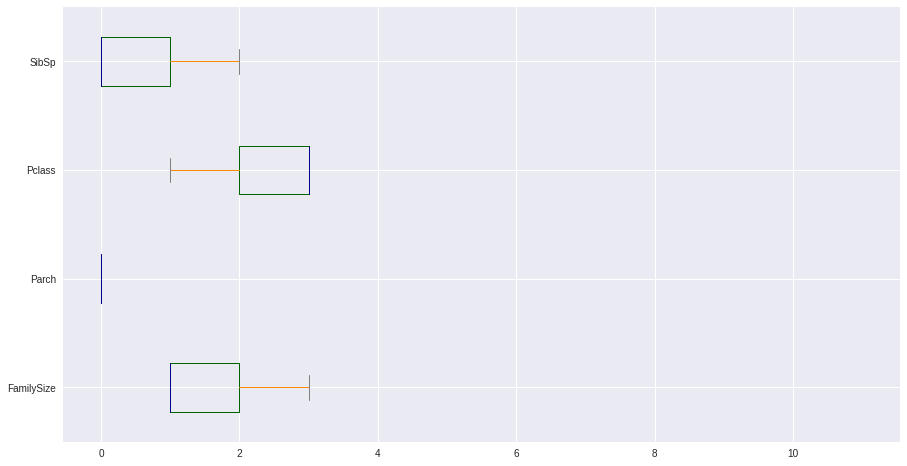

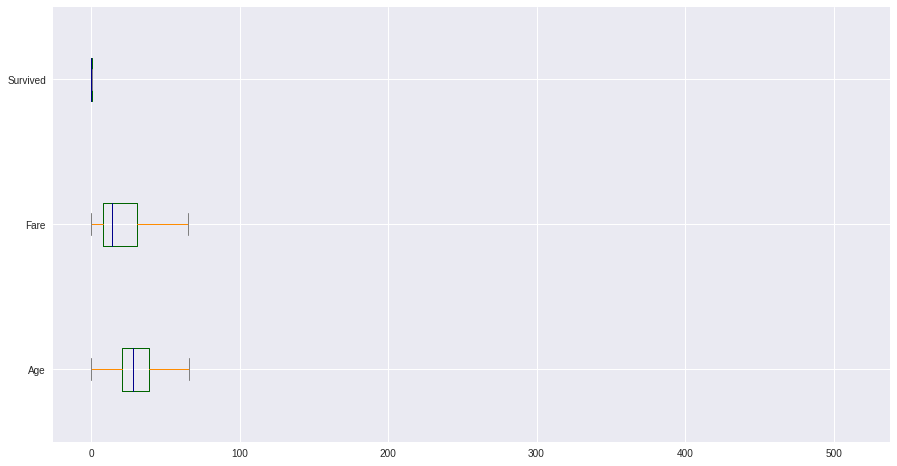

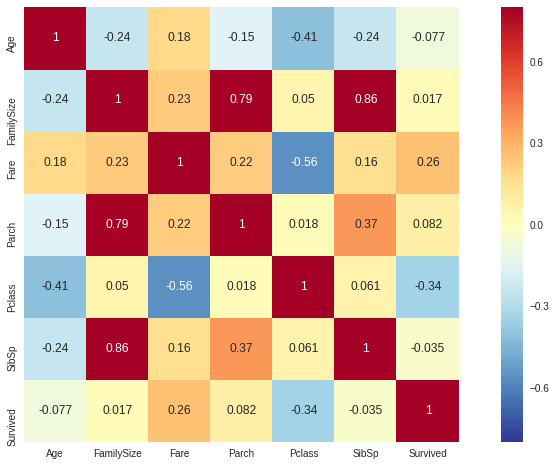

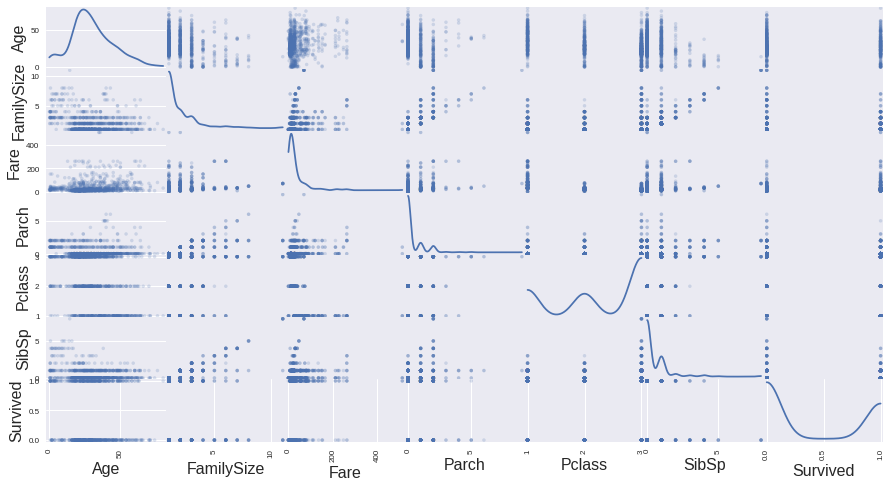

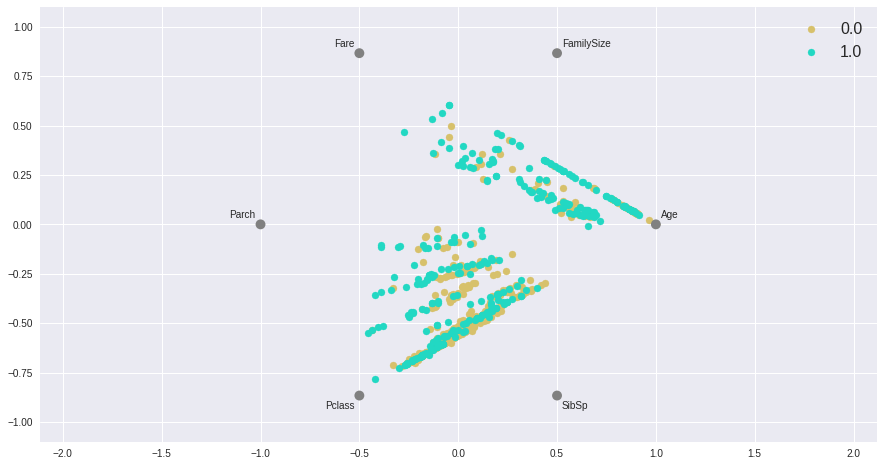

In [83]:
df_combo_numeric = analize_dataframe(df_combo_filtered, 'Survived')

In [84]:
df_combo_numeric

,Age,FamilySize,Fare,Parch,Pclass,SibSp,Survived,Embarked,Sex,Title
min,0.17,1,0,0,1,0,0,0.0939649,0.355997,0.00152788
max,80,11,512.329,9,3,8,1,0.699771,0.644003,0.578304
average,29.8811,1.88388,33.2802,0.385027,2.29488,0.498854,0.383838,0.333333,0.5,0.142857
std,14.4135,1.58364,51.7418,0.86556,0.837836,1.04166,0.486592,NaN,NaN,NaN
median,28,1,14.4542,0,3,0,0,NaN,NaN,NaN
mode,24,1,8.05,0,3,0,0,NaN,NaN,NaN
skew,0.407675,2.85308,4.36947,3.66908,-0.598647,3.84422,0.478523,NaN,NaN,NaN
kurt,0.146948,10.2992,27.0492,21.5411,-1.31508,20.0433,-1.775,NaN,NaN,NaN
NaN#,263,0,0,0,0,0,418,0,0,0
#unique,98,9,282,8,3,7,2,3,2,7
